<a href="https://colab.research.google.com/github/kimayeon-hub/DeepLearning1/blob/main/Python/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 실습: 코로나19 확진자 추이 데이터 (데이터 시각화 하기)

## 1. kaggle에서 데이터 가져오기
- `딥러닝1 > Week4`에 dataset을 저장해 놓음
- 파일 업로드 시키기
  - time_series_covid_19_confirmed.csv
  - time_series_covid_19_deaths.csv
  - time_series_covid_19_recovered.csv

## 2. 데이터를 읽고 변수에 저장하기
- pandas 라이브러리의 read_csv 사용

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv('time_series_covid_19_recovered.csv')

In [6]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


In [7]:
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [9]:
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594


## 3. 대한민국의 데이터만 추출하기

In [29]:
confirmed_korea_df = confirmed_df[confirmed_df['Country/Region'] == 'Korea, South']
deaths_korea_df = deaths_df[deaths_df['Country/Region'] == 'Korea, South']
recovered_korea_df = recovered_df[recovered_df['Country/Region'] == 'Korea, South']

In [23]:
confirmed_korea_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,134678,135344,135929,136467,136983,137682,138311,138898,139431,139910


In [24]:
deaths_korea_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
160,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,1922,1926,1931,1934,1938,1940,1943,1946,1951,1957


In [30]:
recovered_korea_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
145,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,124158,125032,125881,126427,126993,127582,128180,128761,129739,130381


## 4. 그래프로 출력하기
1. numpy 배열로 데이터를 변환시키기
2. matplotlib.pyplot 라이브러리를 사용해서 그래프로 출력하기

In [31]:
confirmed_korea_np = np.array(confirmed_korea_df)
deaths_korea_np = np.array(deaths_korea_df)
recovered_korea_np = np.array(recovered_korea_df)

In [27]:
confirmed_korea_np

array([[1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 24, 24, 25,
        27, 28, 28, 28, 28, 28, 29, 30, 31, 31, 104, 204, 433, 602, 833,
        977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088, 6593,
        7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236, 8320,
        8413, 8565, 8652, 8799, 8961, 8961, 9037, 9137, 9241, 9332, 9478,
        9583, 9661, 9786, 9887, 9976, 10062, 10156, 10237, 10284, 10331,
        10384, 10423, 10450, 10480, 10512, 10537, 10564, 10591, 10613,
        10635, 10653, 10661, 10674, 10683, 10694, 10708, 10718, 10728,
        10738, 10752, 10761, 10765, 10774, 10780, 10793, 10801, 10804,
        10806, 10810, 10822, 10840, 10874, 10909, 10936, 10962, 10991,
        11018, 11037, 11050, 11065, 11078, 11110, 11122, 11142, 11165,
        11190, 11206, 11225, 11265, 11344, 11402, 11441, 11468, 11503,
        11541, 11590, 11629, 11668, 11719, 11776, 11814, 11852, 11902,
        11947, 12003, 12051, 12085, 12121, 12155, 12198, 12257, 

In [32]:
confirmed_korea_np = confirmed_korea_np[:, 5:]  # 시계열 데이터(시간에 따른 확진자 수)만 남겨두기
deaths_korea_np = deaths_korea_np[:, 5:]
recovered_korea_np = recovered_korea_np[:, 5:]

In [17]:
confirmed_korea_np.shape # 배열의 형태 보기

(1, 488)

- 현재 배열이 2차원 형태 (1 X n)로 되어 있음
- 그래프로 올바르게 출력하기 위해서는 인덱싱을 사용해야 함

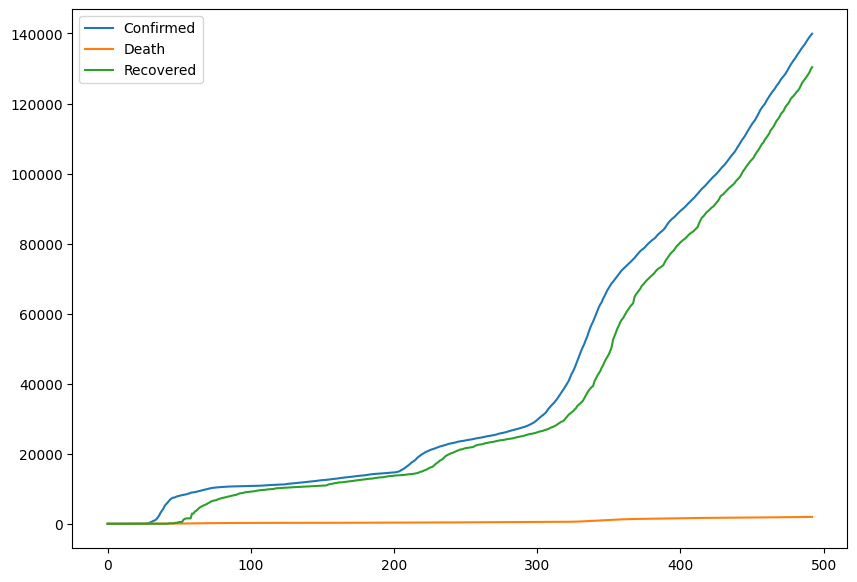

In [36]:
plt.figure(figsize=(10, 7)) # 사이즈 맞추기
plt.plot(confirmed_korea_np[0, :])
plt.plot(deaths_korea_np[0, :])
plt.plot(recovered_korea_np[0, :])
plt.legend(['Confirmed', 'Death', 'Recovered'])